# K-Means Clustering
## Kyle Mikami

In [29]:
#import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import glob
import sklearn
import pandasql
from pandasql import sqldf
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### K-Means on Full Dataset

In [2]:
#Read in consolidated dataset
dataset = pd.read_csv("model_data2.csv")

In [3]:
dataset

,DISTRICT,MONTH,DAY_OF_WEEK,HOUR,Median Age,White Alone,Black / African American,Hispanic,Asian Alone,Other Races,...,PROSTITUTION,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS
0,A1,7.033408,4.034134,12.513945,32.986141,0.700316,0.029173,0.067944,0.175212,0.027454,...,0.207862,0.438652,3.255942,0.261958,0.079964,7.239948,7.067827,1.594640,1.818416,6.784553
1,A15,6.990224,3.826041,13.093500,34.900000,0.719667,0.063833,0.113500,0.080333,0.022833,...,0.000000,0.354359,0.944578,0.253053,0.166541,4.608553,5.037885,2.570483,1.191922,1.192759
2,A7,6.967226,3.962442,13.076501,32.866667,0.333833,0.026833,0.560500,0.041167,0.038167,...,0.003705,0.332539,1.238325,0.122911,0.137881,3.329743,4.537581,2.676015,1.435600,1.296317
3,B2,6.929485,3.913553,13.237799,30.097267,0.224368,0.389967,0.263748,0.079663,0.042449,...,0.100164,0.805532,2.378504,0.702133,0.145011,3.417453,8.010383,9.089829,4.043674,3.692102
4,B3,6.984170,3.949746,13.275074,37.066667,0.064500,0.723833,0.157167,0.019500,0.034833,...,0.019438,2.360219,4.850677,1.769451,0.396645,7.647783,19.247567,26.807097,8.484071,4.878210
5,C11,6.954368,3.935199,13.067816,33.133333,0.219833,0.430833,0.185167,0.101000,0.063000,...,0.089078,0.536698,1.259134,0.223159,0.098609,2.583718,4.759928,4.975176,1.687260,1.881792
6,C6,6.992721,3.969458,12.768413,32.153269,0.773607,0.052529,0.099930,0.052459,0.021453,...,0.078554,0.373794,1.591727,0.248840,0.139623,8.755471,7.343611,3.470135,1.363744,3.342219
7,D14,7.051409,3.976169,12.820425,28.934509,0.620495,0.046337,0.117377,0.174762,0.040817,...,0.109310,0.197901,0.561975,0.194145,0.093932,5.144274,3.598129,1.760091,0.917704,0.656967
8,D4,7.006984,3.955507,12.983868,30.529933,0.607478,0.073335,0.115707,0.167306,0.036406,...,0.046381,0.317460,1.705076,0.094601,0.079262,5.649420,5.130293,2.166338,1.369631,2.904208
9,E13,6.970813,3.879755,13.350468,34.100000,0.547167,0.119000,0.235500,0.058333,0.038500,...,0.004254,0.306405,1.441597,0.318479,0.119816,5.239595,4.924821,3.472188,2.498392,2.159070


In [4]:
#neighborhood_districts = pd.read_csv('Code/Data/Boston Neighborhood Districts.csv')

In [5]:
#Keep only relevant columns
data = dataset.drop(['DISTRICT', 'White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 'Other Races', 'High School Graduate', 'Some College'], axis = 1)

In [6]:
data

,MONTH,DAY_OF_WEEK,HOUR,Median Age,Less than High School,Bachelor's Degree or more,Poverty rate,AIRCRAFT,ARSON,ASSAULT,...,PROSTITUTION,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS
0,7.033408,4.034134,12.513945,32.986141,0.094995,0.736119,0.153507,0.006881,0.052394,18.347000,...,0.207862,0.438652,3.255942,0.261958,0.079964,7.239948,7.067827,1.594640,1.818416,6.784553
1,6.990224,3.826041,13.093500,34.900000,0.088483,0.649333,0.171833,0.000000,0.035865,5.606626,...,0.000000,0.354359,0.944578,0.253053,0.166541,4.608553,5.037885,2.570483,1.191922,1.192759
2,6.967226,3.962442,13.076501,32.866667,0.297417,0.251333,0.185000,0.220112,0.018161,5.467322,...,0.003705,0.332539,1.238325,0.122911,0.137881,3.329743,4.537581,2.676015,1.435600,1.296317
3,6.929485,3.913553,13.237799,30.097267,0.206361,0.319703,0.348782,0.008671,0.074677,13.924128,...,0.100164,0.805532,2.378504,0.702133,0.145011,3.417453,8.010383,9.089829,4.043674,3.692102
4,6.984170,3.949746,13.275074,37.066667,0.173133,0.183667,0.203000,0.000000,0.111243,29.772719,...,0.019438,2.360219,4.850677,1.769451,0.396645,7.647783,19.247567,26.807097,8.484071,4.878210
5,6.954368,3.935199,13.067816,33.133333,0.190950,0.271667,0.227667,0.000000,0.015923,6.339770,...,0.089078,0.536698,1.259134,0.223159,0.098609,2.583718,4.759928,4.975176,1.687260,1.881792
6,6.992721,3.969458,12.768413,32.153269,0.079406,0.642607,0.145167,0.000000,0.028997,10.160311,...,0.078554,0.373794,1.591727,0.248840,0.139623,8.755471,7.343611,3.470135,1.363744,3.342219
7,7.051409,3.976169,12.820425,28.934509,0.076610,0.673646,0.225806,0.000000,0.018281,4.221752,...,0.109310,0.197901,0.561975,0.194145,0.093932,5.144274,3.598129,1.760091,0.917704,0.656967
8,7.006984,3.955507,12.983868,30.529933,0.074968,0.729393,0.264864,0.004036,0.033832,9.089148,...,0.046381,0.317460,1.705076,0.094601,0.079262,5.649420,5.130293,2.166338,1.369631,2.904208
9,6.970813,3.879755,13.350468,34.100000,0.079483,0.645500,0.150833,0.000000,0.025313,7.309472,...,0.004254,0.306405,1.441597,0.318479,0.119816,5.239595,4.924821,3.472188,2.498392,2.159070


In [7]:
#Pull distinct districts
districts = pd.DataFrame(dataset['DISTRICT'])

In [8]:
#Basic K-Means
kmeans = KMeans(n_clusters=5, init = "k-means++", n_init = 10)
y_kmeans = kmeans.fit_predict(data)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
clusters = pd.DataFrame(kmeans.labels_)
clusters

,0
0,2
1,4
2,4
3,0
4,1
5,4
6,3
7,4
8,3
9,0


In [10]:
districts.join(clusters)

,DISTRICT,0
0,A1,2
1,A15,4
2,A7,4
3,B2,0
4,B3,1
5,C11,4
6,C6,3
7,D14,4
8,D4,3
9,E13,0


In [11]:
#Hyperparameter tuning # of clusters using elbow method
distance_df = []
for num_clusters in range(1,12):
    km = KMeans(n_clusters=num_clusters, n_init = 10)
    km.fit(data)
    distance_df.append([num_clusters, km.inertia_])
distance_df = pd.DataFrame(distance_df, columns = ['num_clusters', 'distance'])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak o

In [12]:
distance_df

,num_clusters,distance
0,1,5207.351446
1,2,2044.347976
2,3,985.916102
3,4,605.274211
4,5,457.957653
5,6,293.840555
6,7,200.916452
7,8,136.152955
8,9,62.086484
9,10,32.588448


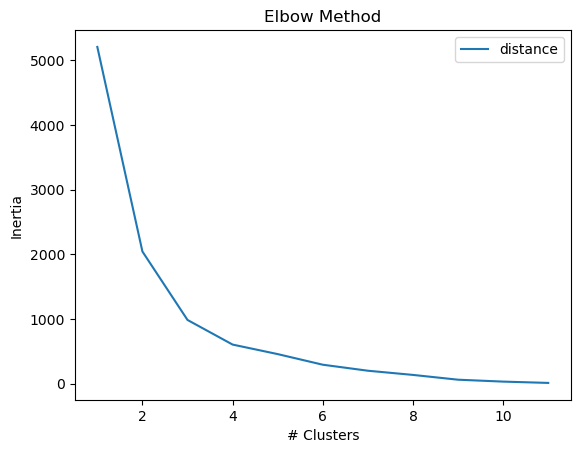

In [13]:
#Plot elbow curve
distance_df.set_index("num_clusters").plot()
plt.xlabel("# Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

We can see from the elbow curve that the ideal number of clusters is around 4 clusters.

In [14]:
#Run KMeans with 4 clusters
kmeans = KMeans(n_clusters = 4, init = "k-means++", n_init = 10)
y_kmeans = kmeans.fit_predict(data)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
clusters = pd.DataFrame(kmeans.labels_)
clusters

,0
0,2
1,3
2,3
3,0
4,1
5,3
6,0
7,3
8,2
9,0


In [16]:
districts.join(clusters)

,DISTRICT,0
0,A1,2
1,A15,3
2,A7,3
3,B2,0
4,B3,1
5,C11,3
6,C6,0
7,D14,3
8,D4,2
9,E13,0


In [17]:
#Summarize Clusters by Types of Crimes
#Join clusters to data
data['Cluster'] = clusters
#data

In [18]:
#Calculate averages by Cluster
summary = data.groupby('Cluster', as_index=False).mean()
summary

,Cluster,MONTH,DAY_OF_WEEK,HOUR,Median Age,Less than High School,Bachelor's Degree or more,Poverty rate,AIRCRAFT,ARSON,...,PROSTITUTION,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS
0,0,6.967277,3.910452,13.159214,33.829301,0.123396,0.472202,0.191279,0.003321,0.035895,...,0.047967,0.533281,1.627433,0.414505,0.144181,4.882674,6.461791,5.627022,2.541289,2.582126
1,1,6.984170,3.949746,13.275074,37.066667,0.173133,0.183667,0.203000,0.000000,0.111243,...,0.019438,2.360219,4.850677,1.769451,0.396645,7.647783,19.247567,26.807097,8.484071,4.878210
2,2,7.020196,3.994821,12.748906,31.758037,0.084981,0.732756,0.209185,0.005459,0.043113,...,0.127122,0.378056,2.480509,0.178280,0.079613,6.444684,6.099060,1.880489,1.594024,4.844381
3,3,6.995925,3.920224,13.007681,34.158782,0.147279,0.469518,0.179922,0.044022,0.022992,...,0.040940,0.316393,0.880088,0.195878,0.119770,3.381588,4.106503,2.824788,1.237607,1.103948


In [19]:
#Export summary to identify results
summary.to_csv('summary.csv', header=True, index=None)

### K-Means on Each Year Separately

In [20]:
#Read in consolidated dataset
dataset_yearly = pd.read_csv("model_data_yearly2.csv")
dataset_yearly

,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,Median Age,White Alone,Black / African American,Hispanic,Asian Alone,...,PROSTITUTION,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS
0,A1,2015,9.185894,3.997758,12.467150,32.661270,0.714909,0.027158,0.060292,0.172636,...,0.169656,0.266602,2.593311,0.387785,0.048473,4.726127,5.307804,0.557441,1.623849,5.307804
1,A1,2016,6.546044,4.044214,12.437755,32.115835,0.712439,0.026454,0.060894,0.176923,...,0.309082,0.689491,3.851641,0.261531,0.047551,8.773181,8.464099,1.307656,1.688065,11.222064
2,A1,2017,6.707128,4.110092,12.365662,32.266154,0.703850,0.028123,0.072998,0.172592,...,0.724705,0.841593,4.161212,0.397419,0.116888,9.351038,7.457453,2.010473,1.098747,12.647279
3,A1,2018,6.546260,4.057284,12.550072,33.435971,0.691667,0.029577,0.076794,0.173991,...,0.000000,0.689719,3.678499,0.252897,0.091962,8.345595,7.816811,1.517381,1.471400,7.586905
4,A1,2019,6.734545,4.036364,12.659144,33.560941,0.701228,0.031321,0.072256,0.167790,...,0.023083,0.000000,3.000785,0.230830,0.092332,6.855639,6.486312,2.585292,2.262130,3.323946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,E5,2016,6.491969,3.895478,13.119842,40.122308,0.621829,0.149984,0.157372,0.045059,...,0.000000,0.258102,0.467810,0.290365,0.129051,1.064671,3.823136,2.435837,1.177590,0.854963
68,E5,2017,6.678527,3.988474,13.039840,41.149645,0.610271,0.150721,0.161674,0.050095,...,0.000000,0.174227,0.475165,0.285099,0.110872,1.251267,2.993538,2.787633,0.807780,0.807780
69,E5,2018,6.398635,3.883215,12.967897,41.146840,0.599071,0.154430,0.164810,0.052446,...,0.015661,0.219257,0.438514,0.187935,0.046984,2.239554,2.537117,2.959970,0.610787,0.673432
70,E5,2019,6.617439,3.888828,13.349319,41.382734,0.596050,0.155542,0.166194,0.051379,...,0.000000,0.000000,0.409146,0.157364,0.078682,1.274647,2.218830,2.753867,0.834028,0.094418


In [21]:
#Separate into annual datasets
d2015 = dataset_yearly[dataset_yearly['YEAR'] == 2015]
d2016 = dataset_yearly[dataset_yearly['YEAR'] == 2016]
d2017 = dataset_yearly[dataset_yearly['YEAR'] == 2017]
d2018 = dataset_yearly[dataset_yearly['YEAR'] == 2018]
d2019 = dataset_yearly[dataset_yearly['YEAR'] == 2019]
d2020 = dataset_yearly[dataset_yearly['YEAR'] == 2020]

In [22]:
#d2020

In [23]:
#Keep only relevant columns in each dataset
d2015 = d2015.drop(['DISTRICT', 'YEAR', 'White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 'Other Races', 'High School Graduate', 'Some College'], axis = 1)
d2016 = d2016.drop(['DISTRICT', 'YEAR', 'White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 'Other Races', 'High School Graduate', 'Some College'], axis = 1)
d2017 = d2017.drop(['DISTRICT', 'YEAR', 'White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 'Other Races', 'High School Graduate', 'Some College'], axis = 1)
d2018 = d2018.drop(['DISTRICT', 'YEAR', 'White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 'Other Races', 'High School Graduate', 'Some College'], axis = 1)
d2019 = d2019.drop(['DISTRICT', 'YEAR', 'White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 'Other Races', 'High School Graduate', 'Some College'], axis = 1)
d2020 = d2020.drop(['DISTRICT', 'YEAR', 'White Alone', 'Black / African American', 'Hispanic', 'Asian Alone', 'Other Races', 'High School Graduate', 'Some College'], axis = 1)

In [24]:
#Run KMeans on each Year
k15 = KMeans(n_clusters = 4, init = "k-means++", n_init = 10)
k16 = KMeans(n_clusters = 4, init = "k-means++", n_init = 10)
k17 = KMeans(n_clusters = 4, init = "k-means++", n_init = 10)
k18 = KMeans(n_clusters = 4, init = "k-means++", n_init = 10)
k19 = KMeans(n_clusters = 4, init = "k-means++", n_init = 10)
k20 = KMeans(n_clusters = 4, init = "k-means++", n_init = 10)

y_k15 = k15.fit_predict(d2015)
y_k16 = k16.fit_predict(d2016)
y_k17 = k17.fit_predict(d2017)
y_k18 = k18.fit_predict(d2018)
y_k19 = k19.fit_predict(d2019)
y_k20 = k20.fit_predict(d2020)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak o

In [25]:
#Clusters for each year
clusters15 = pd.DataFrame(k15.labels_)
clusters16 = pd.DataFrame(k16.labels_)
clusters17 = pd.DataFrame(k17.labels_)
clusters18 = pd.DataFrame(k18.labels_)
clusters19 = pd.DataFrame(k19.labels_)
clusters20 = pd.DataFrame(k20.labels_)

In [26]:
#Consolidate all years into one table
yearly_clusters = districts
yearly_clusters['Neighborhoods'] = ['Downtown areas', 'Charlestown', 'East Boston', 'Roxbury/Longwood/Mission Hill', 
                                    'Mattapan', 'Dorchester', 'South Boston', 'Allston/Brighton', 
                                    'South End/Back Bay/Fenway', 'Jamaica Plain', 'Hyde Park', 'West Roxbury/Roslindale']

yearly_clusters = yearly_clusters.join(clusters) #get original clusters
yearly_clusters.columns = ['DISTRICT', 'Neighborhoods','Overall Cluster']

yearly_clusters['2015'] = clusters15
yearly_clusters['2016'] = clusters16
yearly_clusters['2017'] = clusters17
yearly_clusters['2018'] = clusters18
yearly_clusters['2019'] = clusters19
yearly_clusters['2020'] = clusters20

In [27]:
yearly_clusters

,DISTRICT,Neighborhoods,Overall Cluster,2015,2016,2017,2018,2019,2020
0,A1,Downtown areas,2,2,3,1,3,2,2
1,A15,Charlestown,3,3,1,3,1,0,0
2,A7,East Boston,3,3,1,3,1,0,0
3,B2,Roxbury/Longwood/Mission Hill,0,1,2,0,0,3,3
4,B3,Mattapan,1,0,0,2,2,1,1
5,C11,Dorchester,3,3,1,3,1,0,0
6,C6,South Boston,0,1,2,0,0,3,2
7,D14,Allston/Brighton,3,3,1,3,1,0,0
8,D4,South End/Back Bay/Fenway,2,1,3,1,3,3,2
9,E13,Jamaica Plain,0,3,2,0,0,3,0


Takeaways:
- Mattapan is always its own cluster in every year and seems to have a unique crime profile.
- The downtown areas typically comprise their own cluster across the years, but are occasionally grouped with the South End/Back Bay/Fenway area, which makes sense.  In 2020, South Boston was clustered with those areas instead of other non-downtown areas, suggesting that Southie is becoming more like downtown in terms of crime as even more construction occurs there, etc.
- Generally, the Roxbury/Longwood/Mission Hill neighborhood is clustered with areas like Hyde Park, JP, and Southie.
- As mentioned in the slides, many of the neighborhoods around the perimeter of the city of Boston (Charlestown, East Boston, Dorchester, Allston/Brighton, and West Roxbury/Roslindale) are typically clustered together.  In some years, Jamaica Plain and Hyde Park are also clustered with these neighborhoods.  This cluster comprises most of the land area of Boston.

In [33]:
#Silhouette scores overall and by year
print("Overall: ", silhouette_score(data, kmeans.labels_))
print("2015: ", silhouette_score(d2015, k15.labels_))
print("2016: ", silhouette_score(d2016, k16.labels_))
print("2017: ", silhouette_score(d2017, k17.labels_))
print("2018: ", silhouette_score(d2018, k18.labels_))
print("2019: ", silhouette_score(d2019, k19.labels_))
print("2020: ", silhouette_score(d2020, k20.labels_))

Overall:  0.2923654158552943
2015:  0.34360075520943784
2016:  0.2637844600236229
2017:  0.2531092504973347
2018:  0.27452847596946783
2019:  0.2595272263301555
2020:  0.3318716709427133


In [41]:
#Add silhouette scores to dataframe
silhouette_scores = []
silhouette_scores.append(round(silhouette_score(data, kmeans.labels_),4))
silhouette_scores.append(round(silhouette_score(d2015, k15.labels_),4))
silhouette_scores.append(round(silhouette_score(d2016, k16.labels_),4))
silhouette_scores.append(round(silhouette_score(d2017, k17.labels_),4))
silhouette_scores.append(round(silhouette_score(d2018, k18.labels_),4))
silhouette_scores.append(round(silhouette_score(d2019, k19.labels_),4))
silhouette_scores.append(round(silhouette_score(d2020, k20.labels_),4))

In [46]:
sil = pd.DataFrame()
sil['Year'] = ['Overall', '2015', '2016', '2017', '2018', '2019', '2020']
sil['K-Means Silhouette Score'] = silhouette_scores

In [47]:
#Dataframe with silhouette score by year
sil

,Year,K-Means Silhouette Score
0,Overall,0.2924
1,2015,0.3436
2,2016,0.2638
3,2017,0.2531
4,2018,0.2745
5,2019,0.2595
6,2020,0.3319
